In [100]:
import numpy as np
from scipy.integrate import quad
from scipy.special import gammaincc, gamma, gammainc
import scipy.constants as const
import matplotlib.pyplot as plt

In [101]:
# Value
kpc = 3.086e+19
#kpc = 1

L = 50 * kpc
M_sol = 1.9884e30

R_h = 11.41 * kpc
R_0 = 8.5 * kpc
rho_0 = 0.01992e9 * M_sol / kpc**3
n = 0.43

# Value of c
#c = 1
#c = 3e8
c = const.c

# Value of G
#G = 1
#G = 4.30091e+3 * 3.086e+19/(1.9884e30)
G = const.G

pi = np.pi

In [102]:
# Optical depth

def opt(I, l):
    k = G * I / (c**2 * l)
    return k

In [103]:
# Halo density formula
def rho(x, l):
    return rho_0 * np.exp(-(l * x/R_h)**(1/n)) 

# Halo Mass formula
#def M(x, l):
 #   return 4 * n * pi * rho_0 * R_h**3 * (gamma(3 * n) - gamma(3 * n) * gammaincc(3 * n, (l * x/R_h)**(1/n)))

# Halo Mass formula
def M(x, l):
    return 4 * n * pi * rho_0 * R_h**3 *  (gamma(3 * n) * gammainc(3 * n, (l * x/R_h)**(1/n)))

# First integral v(x)
def u1(x):
    return x**2 / 2 - x * np.log(x) + x

#First inetgral value
def I1(a, b, l):
    return M(b, l) * u1(b) - M(a, l) * u1(a)

# M'(x)
def M_(x, l):
    return 4 * pi * l**3  *  rho(x, l) * x**2

# Second integral value
def integrand(x, l):
    return M_(x, l) * u1(x)

# Mass formula
def int(x, l):
    return G * (M(x, l) * (x - np.log(x))) / (c**2 * l)

In [104]:
l_value = np.arange(8.5, 50, 0.5)


int_val = []
int_val1 = []

for k in l_value:
    l = k * kpc
    res1 = I1(R_0/l, 1, l)
    res2, error = quad(integrand, R_0/l, 1, args=(l,))
    res3, er3 = quad(int, R_0/l, 1, args=(l,))
    
    result = G * (res1 - res2) / (c**2 * l)
    result1 = (res3) 
    
    int_val.append(result)
    int_val1.append(result1)


int_val = np.array(int_val)
int_val1 = np.array(int_val1)


print(int_val)
print(int_val1)

[0.00000000e+00 1.23278242e-08 2.36699997e-08 3.41968296e-08
 4.40252206e-08 5.32358563e-08 6.18847436e-08 7.00111354e-08
 7.76430552e-08 8.48011922e-08 9.15016643e-08 9.77579726e-08
 1.03582371e-07 1.08986801e-07 1.13983507e-07 1.18585409e-07
 1.22806287e-07 1.26660841e-07 1.30164647e-07 1.33334047e-07
 1.36185991e-07 1.38737861e-07 1.41007275e-07 1.43011895e-07
 1.44769254e-07 1.46296579e-07 1.47610654e-07 1.48727696e-07
 1.49663251e-07 1.50432123e-07 1.51048317e-07 1.51525003e-07
 1.51874507e-07 1.52108303e-07 1.52237030e-07 1.52270515e-07
 1.52217803e-07 1.52087197e-07 1.51886298e-07 1.51622053e-07
 1.51300794e-07 1.50928290e-07 1.50509787e-07 1.50050055e-07
 1.49553425e-07 1.49023829e-07 1.48464837e-07 1.47879689e-07
 1.47271326e-07 1.46642416e-07 1.45995383e-07 1.45332430e-07
 1.44655556e-07 1.43966577e-07 1.43267148e-07 1.42558768e-07
 1.41842806e-07 1.41120503e-07 1.40392991e-07 1.39661299e-07
 1.38926364e-07 1.38189038e-07 1.37450096e-07 1.36710245e-07
 1.35970126e-07 1.352303

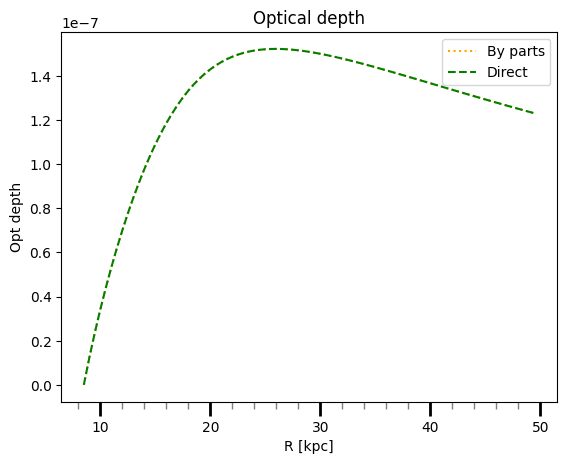

In [105]:
# Create the plot
fig, ax = plt.subplots()

# Plot the data
ax.plot(l_value, int_val, label = 'By parts', color = 'orange', linestyle = ':')
ax.plot(l_value, int_val1, label = 'Direct', color = 'green', linestyle = '--')

# Set major ticks locator and format
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Customize the ticks
ax.tick_params(axis='x', which='major', length=10, width=2)
ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')

# Set labels
ax.set_xlabel('R [kpc]')
ax.set_ylabel('Opt depth')
ax.set_title('Optical depth')

# Show the grid
ax.grid(False, which='both')
plt.legend()

# Display the plot
plt.show()

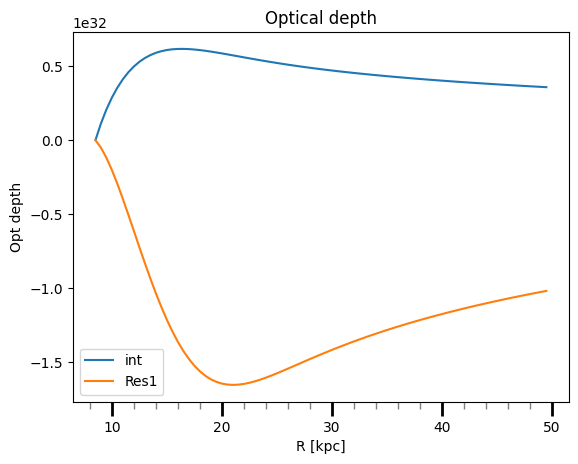

In [106]:
import numpy as np
from scipy.integrate import quad
from scipy.special import gammaincc, gamma
import scipy.constants as const
import matplotlib.pyplot as plt

# Value
kpc = 3.086e+19
#kpc = 1

L = 50 * kpc

R_h = 11.41 * kpc
R_0 = 8.5 * kpc
rho_0 = 0.01992 * 1.9884e30 / (kpc)**3
n = 0.43

# Value of c
#c = 1
#c = 3e8
c = const.c

# Value of G
#G = 1
#G = 4.30091e+3 * 3.086e+19/(1.9884e30)
G = const.G

pi = np.pi

# Opt depth
def opt(I, l):
    return G * I / (c**2 * l)

# Halo density formula
def rho(R):
    return rho_0 * np.exp(-(R/R_h)**(1/n))

# Halo Mass formula
def M(R):
    return 4 * n * pi * rho_0* R_h**3 * gamma(3 * n) * gammaincc(3 * n, (R/R_h)**(1/n))

# First integral v(x)
def u1(x):
    return x**2 / 2 - x * np.log(x) + x

#First inetgral value
def I1(a, b, l):
    return M(l * b) * u1(b) - M(l * a) * u1(a)

# M'(x)
def M_(x, l):
    return 4 * pi * l * x**2

def integrand(x, l):
    return M_(x, l) * u1(x)

def integrand1(x, l):
    return M(l * x) * (x - np.log(x))

l_value = np.arange(8.5, 50, 0.5)

int_val = []
int_val0 = []
int_val1 = []
Res1 = []
Res2 = []
tau = []

for k in l_value:
    l = k * kpc
    res1 = I1(R_0/l, 1, l)
    res2, error = quad(integrand, R_0/l, 1, args=(l,))
    
    result = abs(res1 - res2)

    res3, error1 = quad(integrand1, R_0/l, 1, args=(l,))

    res4 = abs(res3 - result)
    
    OPT = opt(res4, l)
    
    Res1.append(res1)
    Res2.append(res2)
    
    int_val0.append(result)
    int_val1.append(res3)
    int_val.append(res3)
    
    

Res1 = np.array(Res1)
Res2 = np.array(Res2)
    
int_val = np.array(int_val)
int_val0 = np.array(int_val0)
int_val1 = np.array(int_val1)
    
# Create the plot
fig, ax = plt.subplots()

# Plot the data
#ax.plot(l_value, int_val0, label='int by parts')
ax.plot(l_value, int_val, label='int')
ax.plot(l_value, Res1, label='Res1')
#ax.plot(l_value, Res2, label='Res2')

# Set major ticks locator and format
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Customize the ticks
ax.tick_params(axis='x', which='major', length=10, width=2)
ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')

# Set labels
ax.set_xlabel('R [kpc]')
ax.set_ylabel('Opt depth')
ax.set_title('Optical depth')

ax.legend()

# Show the grid
ax.grid(False, which='both')

# Display the plot
plt.show()




In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import gammaincc, gamma

# Constants
R_h = 11.41
n = 0.43
rho0 = 

# Define the integrand function
def integrand(x, L):
    gamma_upper = gamma(3 * n) * gammaincc(3 * n, (L * x / R_h) ** (1 / n))
    return 4 * n * np.pi * gamma_upper * (x - np.log(x))

# Function to perform integration
def integrate_function(L, x_min=0.17, x_max=1):
    result, _ = quad(integrand, x_min, x_max, args=(L,))
    return result

# Generate L values and compute integrals
L_values = np.linspace(8.5, 50, 100)  # 100 values from 8.5 to 50
integral_results = [integrate_function(L) for L in L_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(L_values, integral_results, marker='o', linestyle='-', color='b')
plt.title('Integration Result vs L')
plt.xlabel('L')
plt.ylabel('Integration Result')
plt.grid(True)
plt.show()


SyntaxError: invalid syntax (387071756.py, line 9)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
R_h = 11.41
n = 0.43

# Define the integrand function
def integrand(x, L):
    exponential_term = np.exp(-((L * x / R_h) ** (1 / n)))
    polynomial_term = x**2 * (x**2 / 2 - x * np.log(x) + x)
    return exponential_term * polynomial_term

# Function to perform integration
def integrate_function(L, x_min=0.17, x_max=1):
    result, _ = quad(integrand, x_min, x_max, args=(L,))
    return result

# Generate L values and compute integrals
L_values = np.linspace(8.5, 50, 100)  # 100 values from 8.5 to 50
integral_results = [integrate_function(L) for L in L_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(L_values, integral_results, marker='o', linestyle='-', color='b')
plt.title('Integration Result vs L')
plt.xlabel('L')
plt.ylabel('Integration Result')
plt.grid(True)
plt.show()


In [ ]:
print(gamma(3 * n) * gammaincc(3 * n, 31.066276916398863))
print(gamma(3 * n) * gammaincc(3 * n, 0.504237960935565))
print(gammainc(3 * n, 31.066276916398863))
print(gammainc(3 * n, 0.504237960935565))